In [41]:
import json
from pprint import pprint
import re
import csv

try:
    metadata_file = open("../data/metadata.json", "r")
except FileNotFoundError:
    print("\033[91m\n" + "No metadata file found, aborting" + "\n\033[0m")

metadata = json.load(metadata_file)

metadata_file.close()

genuses = set()
for genome in metadata:
    gn = metadata[genome]
    genus = gn["lineage"][5]
    genuses.add(genus)


In [42]:
clustered_counts = dict()
for genus in genuses:
    with open(f"../large_data/genuses/{genus}/{genus}_clustered.fasta") as f:
        n = 0
        for line in f:
            if line.startswith(">"):
                n += 1
    with open(f"../large_data/genuses/{genus}/{genus}_specific_genes.fasta") as f:
        m = 0
        for line in f:
            if line.startswith(">"):
                m += 1
    clustered_counts[genus] = [m, n]


In [43]:
with open("../data/clustered_genus_counts.json", "w") as f:
    json.dump(clustered_counts, f, indent=4)


In [44]:
species_count_per_genus = dict()
for genus in genuses:
    species_count_per_genus[genus] = 0

for genome in metadata:
    species_count_per_genus[metadata[genome]["lineage"][5]] += 1


In [45]:
def count_orthologs_and_paralogs(cluster_list):
    origin_ids = list()
    for seq in cluster_list:
        origin_ids.append(seq.partition("|")[0])
    sequences = len(cluster_list)
    orthologs = len(set(origin_ids))
    paralogs = sequences - orthologs
    return [sequences, orthologs, paralogs]


cluster_data = list()
for genus in genuses:
    with open(f"../large_data/genuses/{genus}/{genus}_clustered.fasta.clstr") as f:
        cluster = list()
        line = f.readline()
        while line:
            if line.startswith(">"):
                if cluster:
                    result = count_orthologs_and_paralogs(cluster)
                    result.extend([genus, species_count_per_genus[genus]])
                    cluster_data.append(result)
                    cluster = list()
            else:
                cluster.append(line.partition(">")[2].partition("...")[0])
            line = f.readline()


In [46]:
csv_columns = [
    "cluster_size",
    "orthologs_count",
    "paralogs_count",
    "genus",
    "species_count",
]

csv_file = "../data/clusters.csv"
try:
    with open(csv_file, "w") as csvfile:
        writer = csv.writer(csvfile, delimiter=";")
        writer.writerow(csv_columns)    
        writer.writerows(cluster_data)
except IOError:
    print("I/O error")


TOP 20 overall
```
cluster_size   orthologs_count	paralogs_count	genus	species_count 
662	660	2	Streptomyces	762 
477	476	1	Streptomyces	762 
361	360	1	Streptomyces	762 
291	291	0	Streptomyces	762
287	287	0	Streptomyces	762
279	278	1	Streptomyces	762
240	240	0	Streptomyces	762
231	230	1	Streptomyces	762
228	228	0	Streptomyces	762
228	228	0	Streptomyces	762
225	225	0	Streptomyces	762
215	214	1	Streptomyces	762
212	212	0	Streptomyces	762
207	207	0	Streptomyces	762
203	203	0	Streptomyces	762
200	200	0	Streptomyces	762
182	182	0	Streptomyces	762
181	180	1	Streptomyces	762
174	174	0	Prochlorococcus_A	265
173	173	0	Streptomyces	762
```


TOP 20 - genus unique
```
[662, 660, 2, 'Streptomyces', 762]
[382, 382, 0, 'Pseudomonas_E', 574]
[311, 115, 196, 'Mycobacterium', 339]
[292, 1, 291, 'Arsenophonus', 8]
[270, 270, 0, 'Collinsella', 316]
[174, 174, 0, 'Prochlorococcus_A', 265]
[152, 152, 0, 'Pelagibacter', 841]
[118, 116, 2, 'Streptococcus', 301]
[100, 1, 99, 'Endozoicomonas', 10]
[88, 4, 84, 'Spiroplasma', 9]
[83, 28, 55, 'Bacillus_A', 52]
[62, 62, 0, 'Bradyrhizobium', 132]
[59, 1, 58, 'Methyloumidiphilus', 6]
[58, 58, 0, 'AG-337-I02', 108]
[49, 2, 47, 'Hormoscilla', 3]
[45, 45, 0, 'Rhizobium', 133]
[43, 43, 0, 'Acinetobacter', 151]
[41, 1, 40, 'Crocosphaera', 5]
[40, 39, 1, 'Polynucleobacter', 69]
[39, 39, 0, 'Flavobacterium', 319]
[38, 37, 1, 'HIMB59', 55]
```

In [47]:
printed = list()
n = 0
for cluster in sorted(cluster_data, key=lambda x: x[0])[::-1]:
    if cluster[3] not in printed:
        print(cluster)
        printed.append(cluster[3])
        n+=1
    if n > 20:
        break


[662, 660, 2, 'Streptomyces', 762]
[382, 382, 0, 'Pseudomonas_E', 574]
[311, 115, 196, 'Mycobacterium', 339]
[292, 1, 291, 'Arsenophonus', 8]
[270, 270, 0, 'Collinsella', 316]
[174, 174, 0, 'Prochlorococcus_A', 265]
[152, 152, 0, 'Pelagibacter', 841]
[118, 116, 2, 'Streptococcus', 301]
[100, 1, 99, 'Endozoicomonas', 10]
[88, 4, 84, 'Spiroplasma', 9]
[83, 28, 55, 'Bacillus_A', 52]
[62, 62, 0, 'Bradyrhizobium', 132]
[59, 1, 58, 'Methyloumidiphilus', 6]
[58, 58, 0, 'AG-337-I02', 108]
[49, 2, 47, 'Hormoscilla', 3]
[45, 45, 0, 'Rhizobium', 133]
[43, 43, 0, 'Acinetobacter', 151]
[41, 1, 40, 'Crocosphaera', 5]
[40, 39, 1, 'Polynucleobacter', 69]
[39, 39, 0, 'Flavobacterium', 319]
[38, 37, 1, 'HIMB59', 55]


In [48]:
how_many_of_each_cluster_size = dict()
for cl in cluster_data:
    if cl[0] not in how_many_of_each_cluster_size:
        how_many_of_each_cluster_size[cl[0]] = 1
    else:
        how_many_of_each_cluster_size[cl[0]] += 1
with open("../data/how_many_of_each_cluster_size.json", "w") as outfile:
    json.dump(dict(sorted(how_many_of_each_cluster_size.items())), outfile, indent=4)


Number of clusters with size 1: 1862132
Number of clusters with size 2: 178807
Number of clusters with size 3: 39667
Number of clusters with size 4: 14682
Number of clusters with size 5: 7218
Number of clusters with size 6: 4286
Number of clusters with size 7: 2754
Number of clusters with size 8: 1897
Number of clusters with size 9: 1348
Number of clusters with size 10: 894


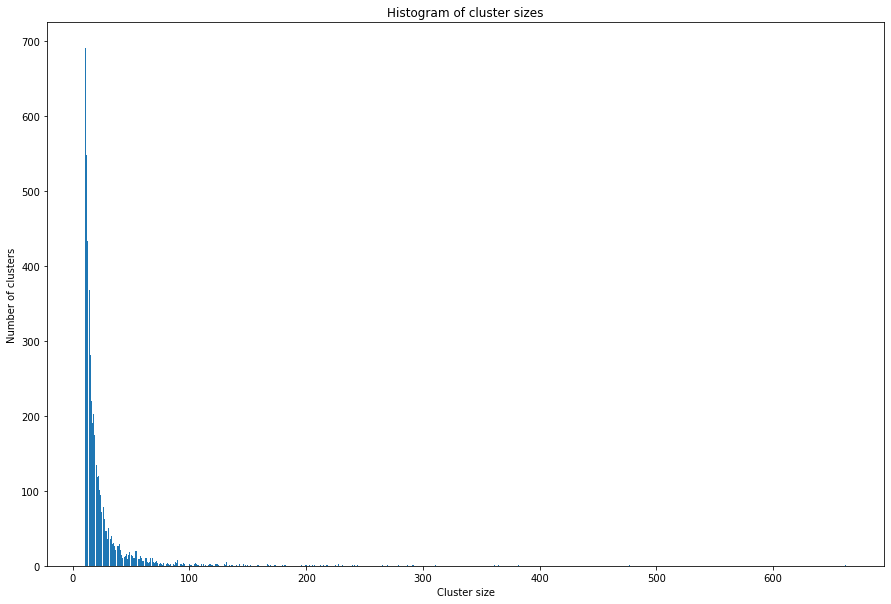

In [49]:
import matplotlib.pyplot as plt

for i in range(1,11):
    print(f"Number of clusters with size {i}: {how_many_of_each_cluster_size[i]}")
    how_many_of_each_cluster_size.pop(i)
    

plt.bar(list(how_many_of_each_cluster_size.keys()), how_many_of_each_cluster_size.values())
plt.title("Histogram of cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Number of clusters")
plt.gcf().set_size_inches(15, 10)
plt.show()